In [35]:
import pandas as pd

In [63]:
df = pd.read_csv('FantasyPros_2022_Overall_ADP_Rankings.csv')

In [64]:
#drop MFL, all Nan's
df = df.drop(columns='MFL')
df.head()

,Rank,Player,Team,Bye,POS,ESPN,RTSports,Fantrax,FFC,Sleeper,AVG
0,1,Jonathan Taylor,IND,14.0,RB,1.0,1.0,1.0,1.0,1.0,1.0
1,2,Austin Ekeler,LAC,8.0,RB,3.0,2.0,2.0,3.0,4.0,2.8
2,3,Christian McCaffrey,CAR,13.0,RB,4.0,3.0,4.0,6.0,2.0,3.8
3,4,Cooper Kupp,LAR,7.0,WR,2.0,5.0,3.0,5.0,6.0,4.2
4,5,Derrick Henry,TEN,6.0,RB,5.0,7.0,5.0,2.0,3.0,4.4


In [65]:
df.shape

(349, 11)

In [66]:
#creating a draft pool consisting of 10 teams with 15 picks
num_teams = 10
num_roster_spots = 15
draft_pool = num_teams * num_roster_spots
df = df[:draft_pool]

print(df.shape)
df.head()

(150, 11)


,Rank,Player,Team,Bye,POS,ESPN,RTSports,Fantrax,FFC,Sleeper,AVG
0,1,Jonathan Taylor,IND,14.0,RB,1.0,1.0,1.0,1.0,1.0,1.0
1,2,Austin Ekeler,LAC,8.0,RB,3.0,2.0,2.0,3.0,4.0,2.8
2,3,Christian McCaffrey,CAR,13.0,RB,4.0,3.0,4.0,6.0,2.0,3.8
3,4,Cooper Kupp,LAR,7.0,WR,2.0,5.0,3.0,5.0,6.0,4.2
4,5,Derrick Henry,TEN,6.0,RB,5.0,7.0,5.0,2.0,3.0,4.4


In [67]:
#creating the range of each player using the best and worst expert rankings
df['Worst'] = df[['ESPN','RTSports','Fantrax','FFC','Sleeper']].max(axis=1)
df['Best'] = df[['ESPN','RTSports','Fantrax','FFC','Sleeper']].min(axis=1)

In [68]:
df.head(20)

,Rank,Player,Team,Bye,POS,ESPN,RTSports,Fantrax,FFC,Sleeper,AVG,Worst,Best
0,1,Jonathan Taylor,IND,14.0,RB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,Austin Ekeler,LAC,8.0,RB,3.0,2.0,2.0,3.0,4.0,2.8,4.0,2.0
2,3,Christian McCaffrey,CAR,13.0,RB,4.0,3.0,4.0,6.0,2.0,3.8,6.0,2.0
3,4,Cooper Kupp,LAR,7.0,WR,2.0,5.0,3.0,5.0,6.0,4.2,6.0,2.0
4,5,Derrick Henry,TEN,6.0,RB,5.0,7.0,5.0,2.0,3.0,4.4,7.0,2.0
5,6,Najee Harris,PIT,9.0,RB,8.0,4.0,7.0,4.0,8.0,6.2,8.0,4.0
6,7,Justin Jefferson,MIN,7.0,WR,6.0,6.0,6.0,8.0,7.0,6.6,8.0,6.0
7,8,Dalvin Cook,MIN,7.0,RB,10.0,8.0,8.0,7.0,5.0,7.6,10.0,5.0
8,9,Ja'Marr Chase,CIN,10.0,WR,7.0,9.0,10.0,12.0,9.0,9.4,12.0,7.0
9,10,Davante Adams,LV,6.0,WR,9.0,12.0,9.0,11.0,10.0,10.2,12.0,9.0


C:\Users\Jaden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jaden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jaden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jaden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

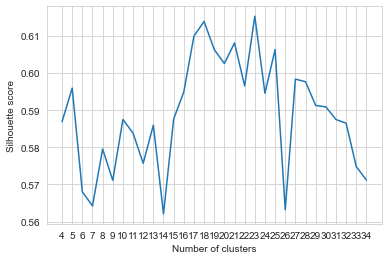

In [69]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns; sns.set_style('whitegrid');

avgs = []

#iterating between 4 and 35 clusters
start = 4 
stop = 35

for n_clusters in range(start, stop):

    X = df[['AVG']].values   #taking the values from the average draft ranking 

    model = KMeans(n_clusters=n_clusters) # instantiate the model with hyperparameters
    
    model.fit(X) # fit the model
    
    labels = model.predict(X) # predict labels (assign clusters) to our data
    
    silhouette_avg = silhouette_score(X, labels) # calculate the silhouette avg for our labels
    
    avgs.append(silhouette_avg) # append it to a list for plotting later

#plotting results
plt.plot(np.arange(start, stop, 1), avgs);
plt.xlabel('Number of clusters');
plt.ylabel('Silhouette score');
#lets us set the ticks manually
plt.xticks(np.arange(start, stop, 1));

In [70]:
pd.set_option('display.max_rows', None)

k = 18 # this is the optimal value we got back from doing the silhouette analysis above

model = KMeans(n_clusters=k)

model.fit(X)

labels = model.predict(X)

def assign_tiers(labels):
    """
    This function maps the random labels to actual fantasy football tiers.
    """
    
    unique_labels = []
    tiers = []
    
    for i in labels:
        
        if i not in unique_labels:
            unique_labels.append(i)

        tiers.append(
            len(set(unique_labels))
        )
        
    return tiers

# map labels -> tiers
tiers = assign_tiers(labels)

# create a new column for tiers
df['Tier'] = tiers

df.set_index('Tier').head(20)

C:\Users\Jaden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Rank,Player,Team,Bye,POS,ESPN,RTSports,Fantrax,FFC,Sleeper,AVG,Worst,Best
Tier,,,,,,,,,,,,,
1,1,Jonathan Taylor,IND,14.0,RB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,Austin Ekeler,LAC,8.0,RB,3.0,2.0,2.0,3.0,4.0,2.8,4.0,2.0
1,3,Christian McCaffrey,CAR,13.0,RB,4.0,3.0,4.0,6.0,2.0,3.8,6.0,2.0
1,4,Cooper Kupp,LAR,7.0,WR,2.0,5.0,3.0,5.0,6.0,4.2,6.0,2.0
1,5,Derrick Henry,TEN,6.0,RB,5.0,7.0,5.0,2.0,3.0,4.4,7.0,2.0
1,6,Najee Harris,PIT,9.0,RB,8.0,4.0,7.0,4.0,8.0,6.2,8.0,4.0
1,7,Justin Jefferson,MIN,7.0,WR,6.0,6.0,6.0,8.0,7.0,6.6,8.0,6.0
1,8,Dalvin Cook,MIN,7.0,RB,10.0,8.0,8.0,7.0,5.0,7.6,10.0,5.0
1,9,Ja'Marr Chase,CIN,10.0,WR,7.0,9.0,10.0,12.0,9.0,9.4,12.0,7.0


In [85]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set_style('whitegrid')

def make_clustering_viz(df, pos=None, figsize=(20, 20)):
    
    """
    Create a clustering visualization given our df.
    
    """
    # if pos is provided as an argument to the function.
    if pos:
        df = df.loc[df['POS'].str.contains(pos)]
    
    # some of these values are hexidecimal color codes.
    colors = ['purple', 'magenta', 'red', 'blue', 'orange', 'green',
              'salmon', 'yellow', 'black', 'grey', '#3498db', '#16a085', '#f4d03f', '#f1948a',
              '#48c9b0', '#3498db', '#e74c3c', '#d7bde2', '#d0d3d4'
              ]
    
    # create a dictionary with the keys of 1 -> 5, and the corresponding color for each tier.
    colors = dict(zip(range(1, k+1), colors[:k]))
    
    # set the figure size
    plt.figure(figsize=figsize)
    
    # plot Avg. vs. Rank. Our visualization will have Avg on the x-axis and ECR on the y-axis.
    plt.scatter(x=df['AVG'], 
                y=df['Rank'], 
                c='#212f3d', # color of the point
                alpha=0.9, # 90% transparency
                s=7 # size 
               )
    
    yticks = [] # for storing player-names on the y-axis
    
    for _, row in df.iterrows():
        
        # we are going to plot a horizontal line along each point with a range stemming from
        # best (xmin) to worst (xmax) ranking.
        
        xmin = row['Best'] 
        xmax = row['Worst']
        
        ymin, ymax = row['Rank'], row['Rank'] 
        
        player = row['Player'] # annotate the y-ticks with player names
        
        tier = row['Tier']
        
        # plot a horizontal line
        plt.plot((xmin, xmax), (ymin, ymax), c=colors.get(tier, 'black'), alpha=0.8) # plot each individual horizontal line with either the tier color value or black
        
        yticks.append(player) # append the yticks list with the player's name
    
    # this will be used for the legend
    
    patches = []
    for tier, color in colors.items():
        patch = mpatches.Patch(color=color, label=f'Tier {tier}') # legend label + color
        patches.append(patch)
    
    plt.legend(handles=patches, borderpad=1, fontsize=12) # update the legend with the patches
    
    # setting xlabel, ylabel and yticks (player names)
    plt.xlabel('Average Expert Rank', fontsize=12)
    plt.ylabel('Expert Consensus Rank', fontsize=12)
    plt.yticks(df['Rank'], yticks, fontsize=12)
    
    # setting title
    plt.title('Tiers for the 2022 Draft. ECR vs. Average Expert Rank.', fontsize=12)
    
    # gca stands for get current axis. It's a roundabout way of grabbing the ax object
    # we are inverting the y-axis here to show top players at the top.

    plt.gca().invert_yaxis()
    plt.show()

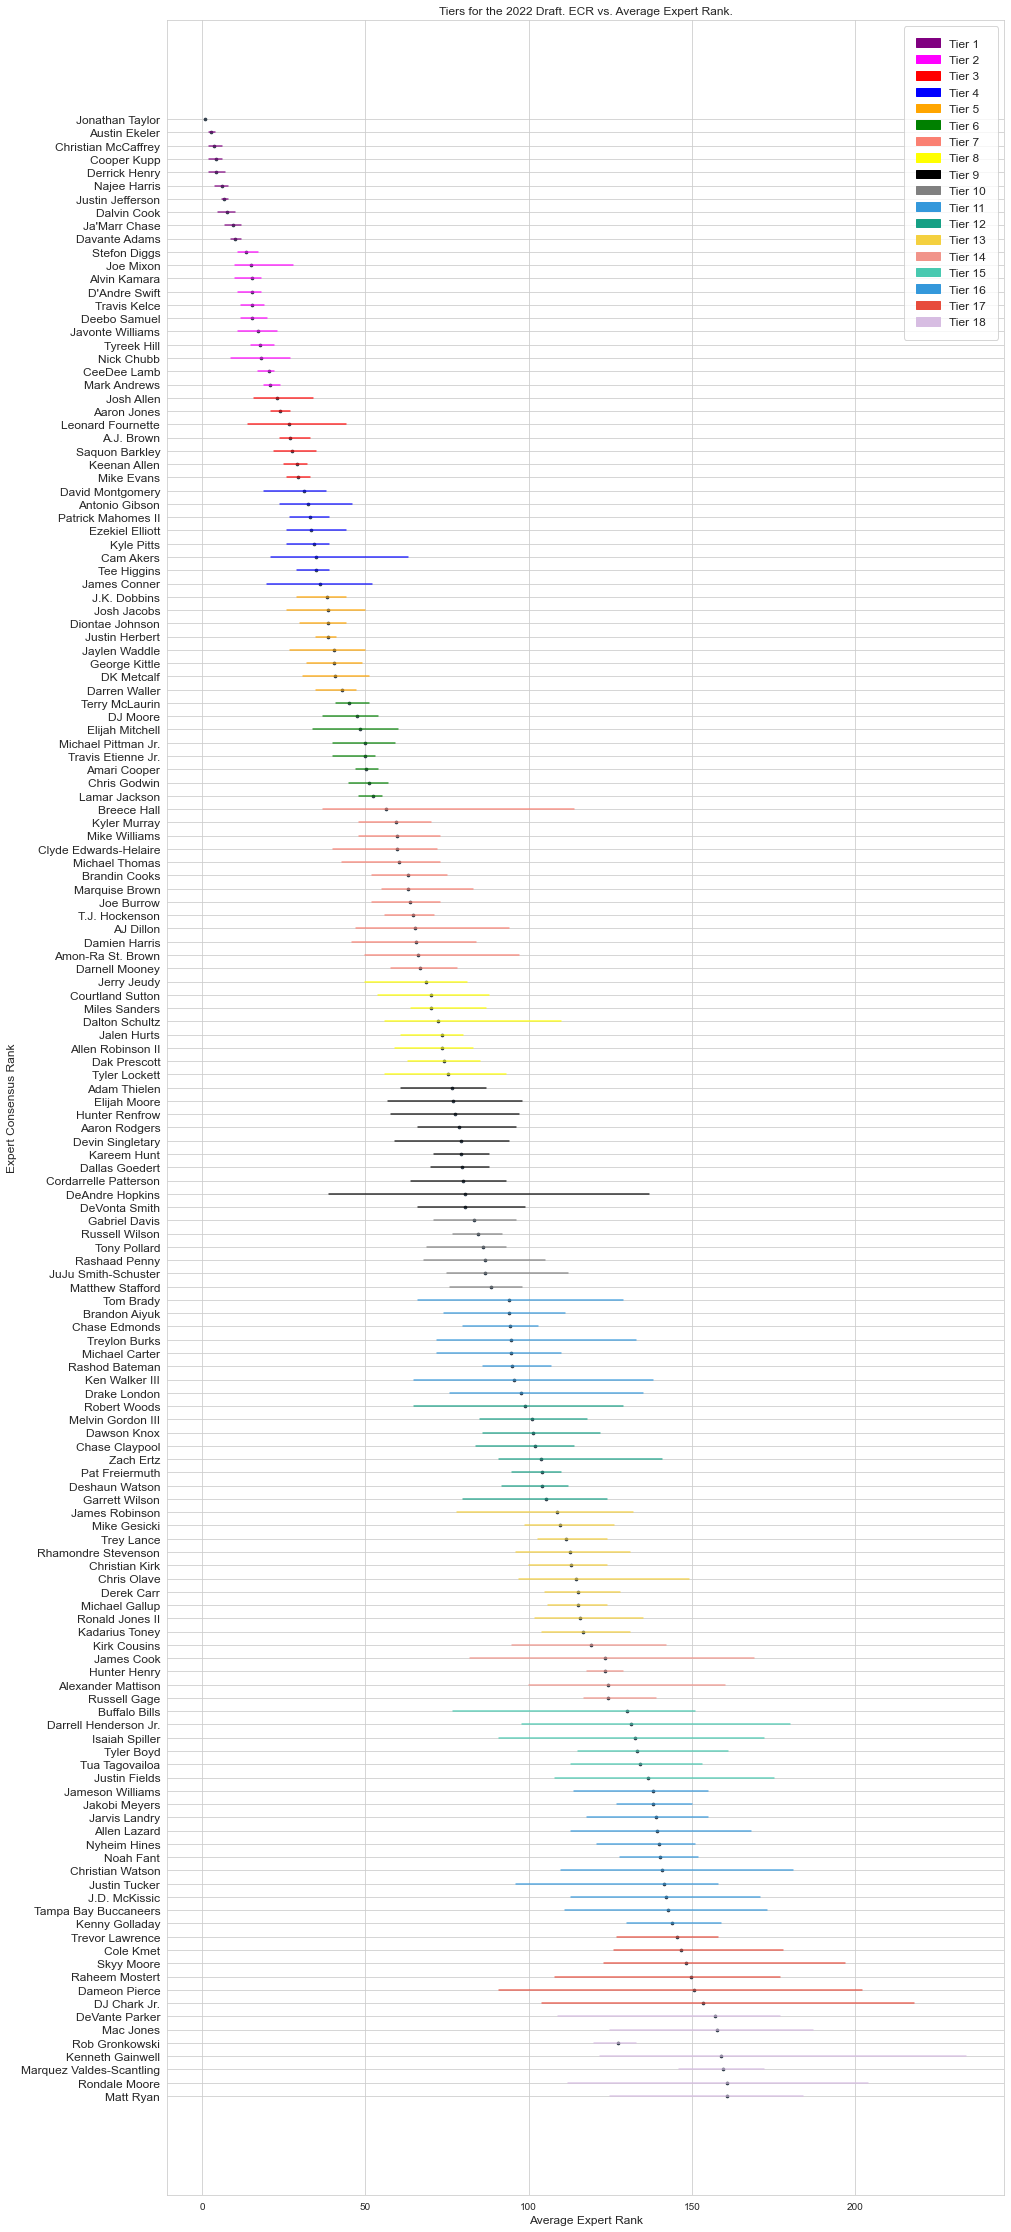

In [86]:
make_clustering_viz(df, figsize=(15, 40))

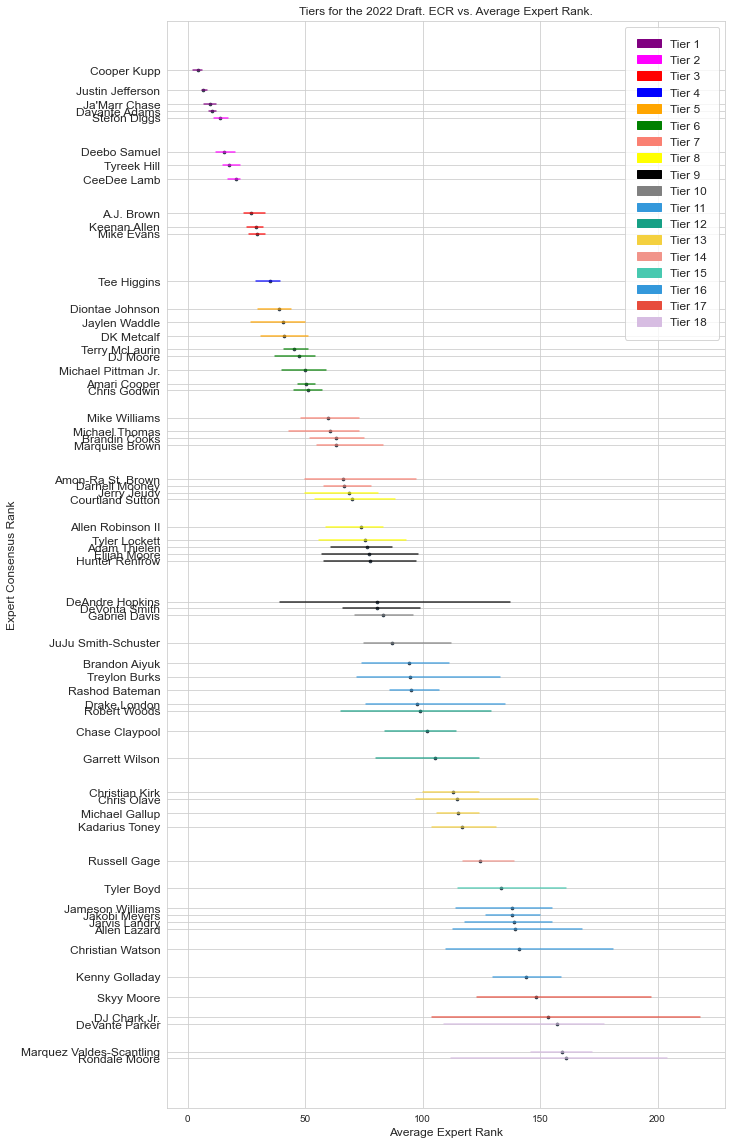

In [87]:
make_clustering_viz(df, 'WR', figsize=(10, 20))

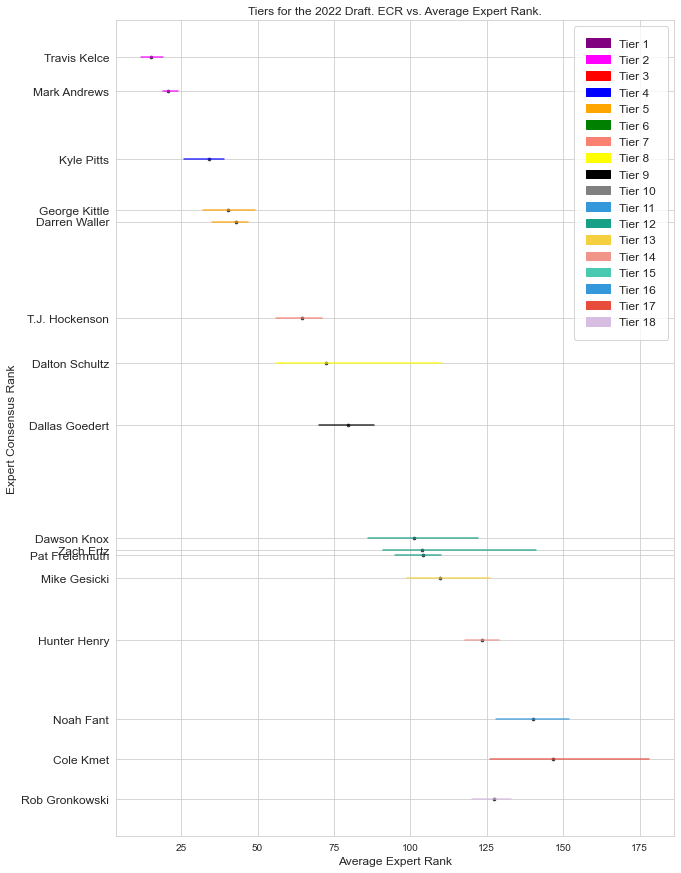

In [88]:
make_clustering_viz(df, 'TE', figsize=(10, 15))

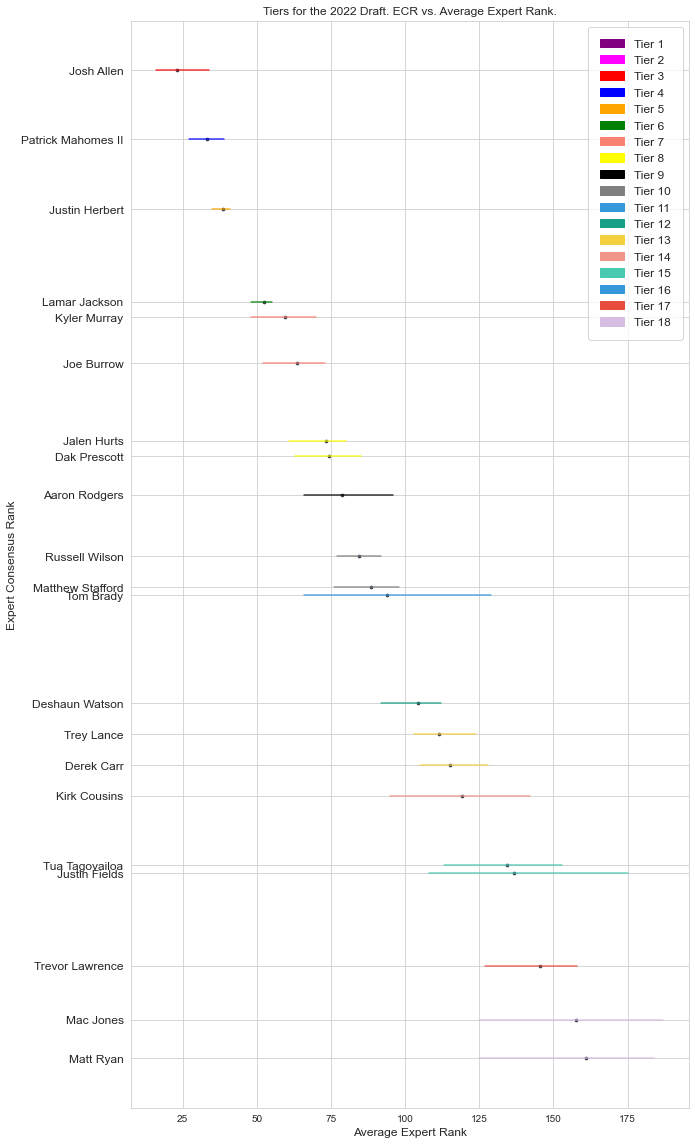

In [89]:
make_clustering_viz(df, 'QB', figsize=(10, 20))

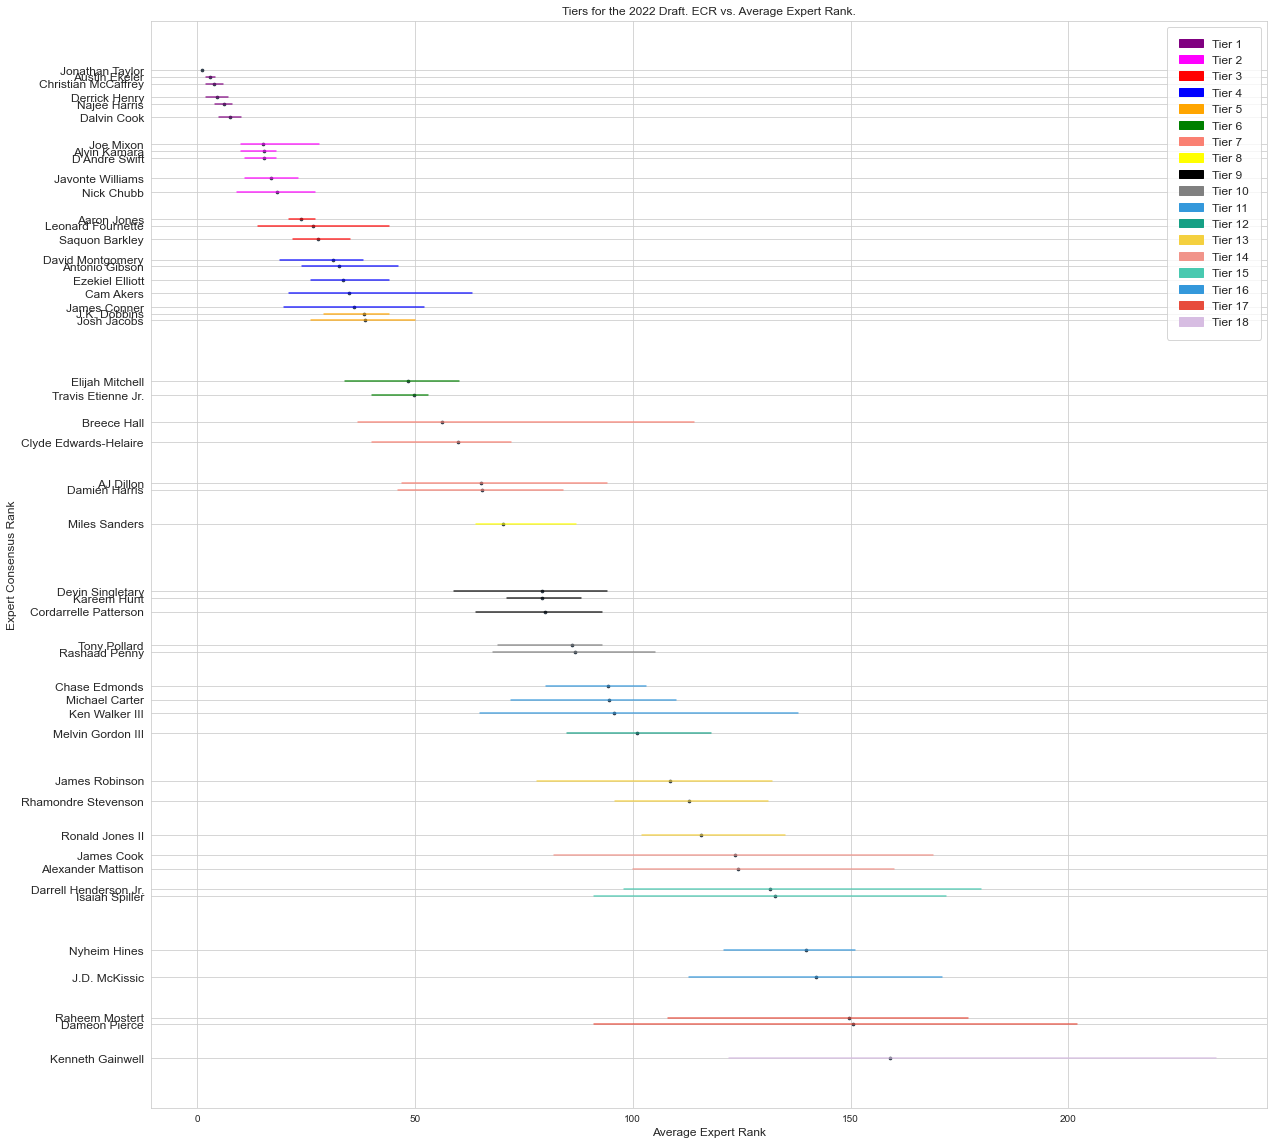

In [90]:
make_clustering_viz(df, 'RB', figsize=(20, 20))